# (A). Loading libaries

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [261]:
import warnings
warnings.filterwarnings('ignore')

In [262]:
pd.set_option('display.max_row',None)
pd.set_option('display.max_column',None)

# (B). Import Dataset

In [263]:
data = pd.read_csv('train.csv')

# (C). Data Quality check

#### 1. Dimension of Data

In [264]:
data.shape

(1460, 81)

#### 2. Data Glimpse

In [265]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### 3. Data Types

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# (D). EDA

#### 1. Data Bifurcation

In [267]:
# Integer
data_int = data.select_dtypes(include=['int64'])

In [268]:
# Integer data shape
data_int.shape

(1460, 35)

In [269]:
# Float
data_float = data.select_dtypes(include = ['float'])

In [270]:
# Float data shape
data_float.shape

(1460, 3)

In [271]:
# Object/Categorical
data_cat = data.select_dtypes(include=['object'])

In [272]:
# Categorical date shape
data_cat.shape

(1460, 43)

#### 2. Concating integer & float dataframe

In [273]:
df_num = pd.concat([data_int, data_float], axis = 1)

In [274]:
df_num.shape

(1460, 38)

In [275]:
df_num.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,65.0,196.0,2003.0
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,80.0,0.0,1976.0
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,68.0,162.0,2001.0
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,60.0,0.0,1998.0
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,84.0,350.0,2000.0


In [276]:
df_cat = data_cat.copy()

In [277]:
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### 3. Checking NA's in dataframe

In [278]:
df_num.isna().sum()

Id                 0
MSSubClass         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
LotFrontage      259
MasVnrArea         8
GarageYrBlt       81
dtype: int64

In [279]:
df_cat.isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

#### 4. Removing columns where NA is greater than 80%

In [280]:
# limit percentage 80%

limitPer = len(df_cat) * .80

df_num_1 = df_num.dropna(thresh=limitPer, axis=1)

df_cat_1 = df_cat.dropna(thresh=limitPer, axis=1)

#### 5. Removing not required 'Id' column

In [281]:
df_num_1.drop(['Id'], axis=1, inplace = True)

In [282]:
print(df_num_1.shape)
print(df_cat_1.shape)

(1460, 37)
(1460, 38)


In [283]:
df_num_1.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt
0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,65.0,196.0,2003.0
1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,80.0,0.0,1976.0
2,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,68.0,162.0,2001.0
3,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,60.0,0.0,1998.0
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,84.0,350.0,2000.0


In [284]:
df_cat_1.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


#### 4. Checking Linear Relationship between numerical variable and target variable using Pairplot

In [285]:
# Column names in df_num_1
df_num_1.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea',
       'GarageYrBlt'],
      dtype='object')

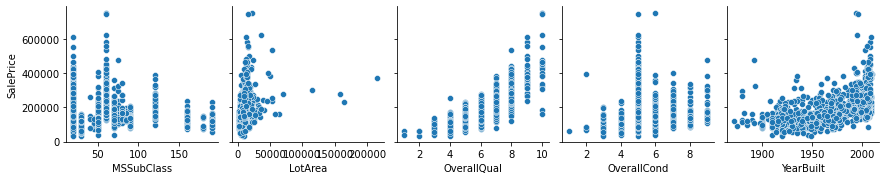

In [286]:
# Pairplot for first 5 columns
sns.pairplot(df_num_1, x_vars = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt'], y_vars=['SalePrice'])
plt.show()
# Outcome
# 1. MSSubClass : No linear Correlation
# 2. LotArea: No linear Correlation
# 3. OverallQual: Linear Correlation
# 4. OverallCond: Linear Correlation
# 5. YearBuilt: Linear Correlation

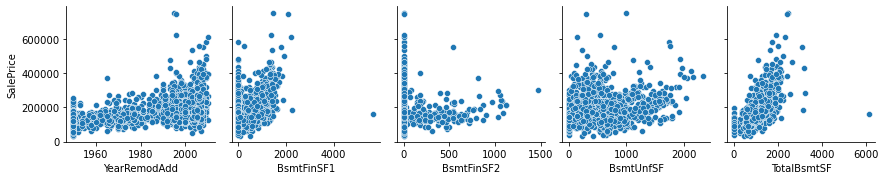

In [287]:
# Pairplot for first 5 columns
sns.pairplot(df_num_1, x_vars = ['YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'], y_vars=['SalePrice'])
plt.show()
# Outcome
# 1. YearRemodAdd : Little linear Correlation
# 2. BsmtFinSF1: Little linear Correlation
# 3. BsmtFinSF2: No Linear Correlation
# 4. BsmtUnfSF: Linear Correlation
# 5. TotalBsmtSF: Linear Correlation

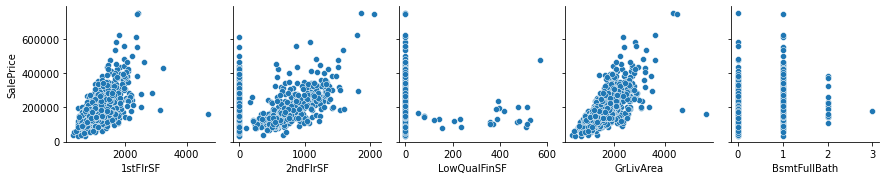

In [288]:
# Pairplot for first 5 columns
sns.pairplot(df_num_1, x_vars = ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath'], y_vars=['SalePrice'])
plt.show()


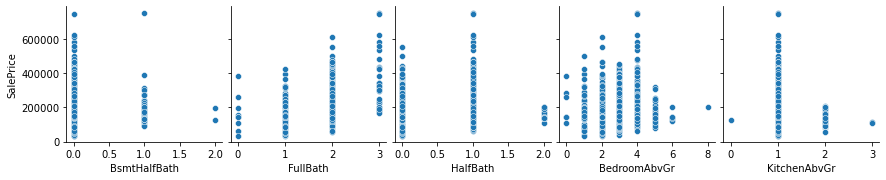

In [289]:
# Pairplot for first 5 columns
sns.pairplot(df_num_1, x_vars = ['BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr'], y_vars=['SalePrice'])
plt.show()


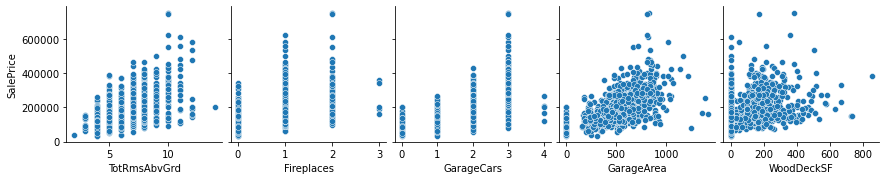

In [290]:
# Pairplot for first 5 columns
sns.pairplot(df_num_1, x_vars = ['TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF'], y_vars=['SalePrice'])
plt.show()


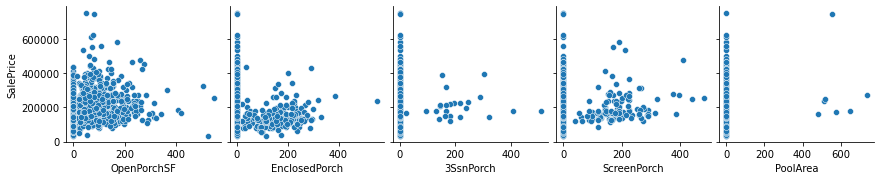

In [291]:
# Pairplot for first 5 columns
sns.pairplot(df_num_1, x_vars = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'], y_vars=['SalePrice'])
plt.show()


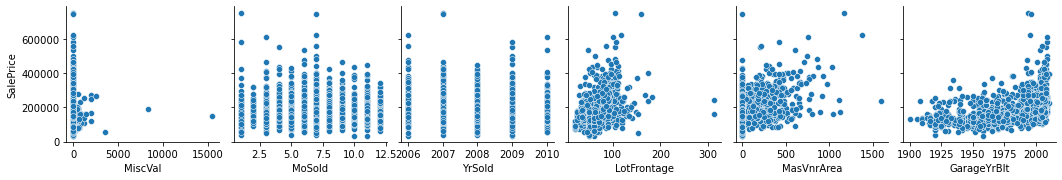

In [292]:
# Pairplot for first 5 columns
sns.pairplot(df_num_1, x_vars = ['MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'MasVnrArea',
       'GarageYrBlt'], y_vars=['SalePrice'])
plt.show()


In [293]:
df_num_1.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea',
       'GarageYrBlt'],
      dtype='object')

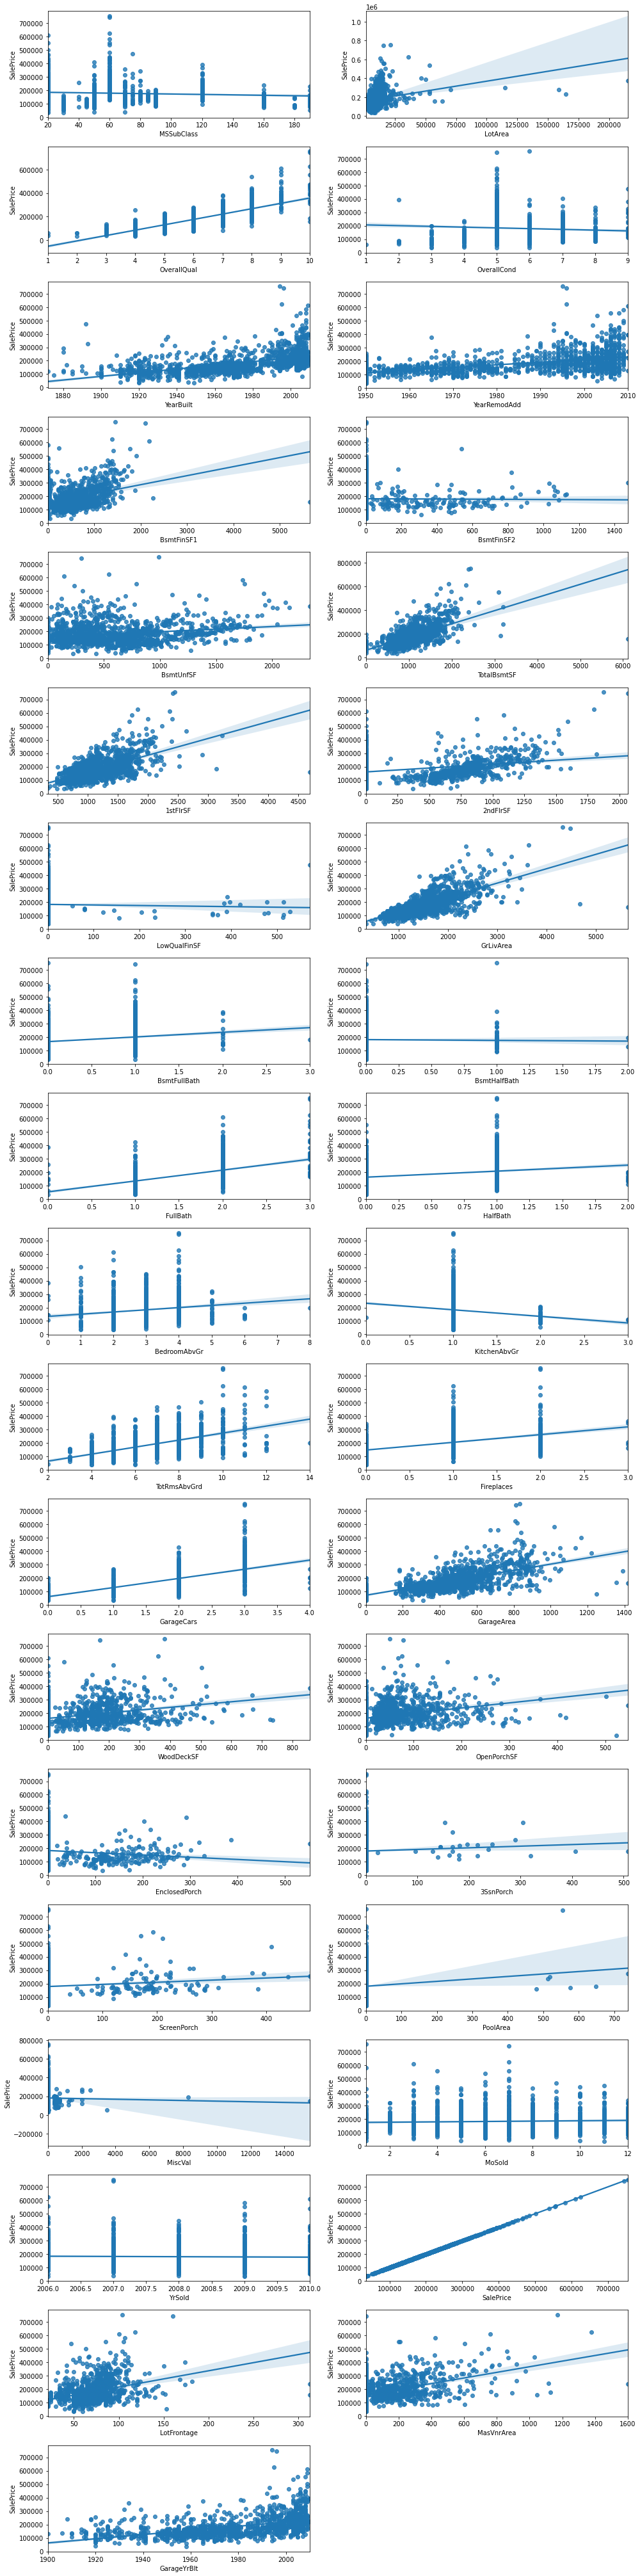

In [294]:
plt.figure(figsize=(14,56))

plt.subplot(19,2,1)
sns.regplot(x = 'MSSubClass', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,2)
sns.regplot(x = 'LotArea', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,3)
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,4)
sns.regplot(x = 'OverallCond', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,5)
sns.regplot(x = 'YearBuilt', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,6)
sns.regplot(x = 'YearRemodAdd', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,7)
sns.regplot(x = 'BsmtFinSF1', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,8)
sns.regplot(x = 'BsmtFinSF2', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,9)
sns.regplot(x = 'BsmtUnfSF', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,10)
sns.regplot(x = 'TotalBsmtSF', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,11)
sns.regplot(x = '1stFlrSF', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,12)
sns.regplot(x = '2ndFlrSF', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,13)
sns.regplot(x = 'LowQualFinSF', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,14)
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,15)
sns.regplot(x = 'BsmtFullBath', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,16)
sns.regplot(x = 'BsmtHalfBath', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,17)
sns.regplot(x = 'FullBath', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,18)
sns.regplot(x = 'HalfBath', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,19)
sns.regplot(x = 'BedroomAbvGr', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,20)
sns.regplot(x = 'KitchenAbvGr', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,21)
sns.regplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,22)
sns.regplot(x = 'Fireplaces', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,23)
sns.regplot(x = 'GarageCars', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,24)
sns.regplot(x = 'GarageArea', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,25)
sns.regplot(x = 'WoodDeckSF', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,26)
sns.regplot(x = 'OpenPorchSF', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,27)
sns.regplot(x = 'EnclosedPorch', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,28)
sns.regplot(x = '3SsnPorch', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,29)
sns.regplot(x = 'ScreenPorch', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,30)
sns.regplot(x = 'PoolArea', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,31)
sns.regplot(x = 'MiscVal', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,32)
sns.regplot(x = 'MoSold', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,33)
sns.regplot(x = 'YrSold', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,34)
sns.regplot(x = 'SalePrice', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,35)
sns.regplot(x = 'LotFrontage', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,36)
sns.regplot(x = 'MasVnrArea', y = 'SalePrice', data = df_num_1)

plt.subplot(19,2,37)
sns.regplot(x = 'GarageYrBlt', y = 'SalePrice', data = df_num_1)

plt.tight_layout()

plt.show()


Linear relationship like

- 1stFlrSF : linear Correlation
- 2ndFlrSF: linear Correlation
- LowQualFinSF: No Linear Correlation
- GrLivArea: Linear Correlation
- BsmtFullBath: No Linear Correlation
- BsmtHalfBath : No linear Correlation
- FullBath: linear Correlation
- HalfBath: No Linear Correlation
- BedroomAbvGr: No Linear Correlation
- KitchenAbvGr: No Linear Correlation
- TotRmsAbvGrd : linear Correlation
- Fireplaces: Little linear Correlation
- GarageCars: Linear Correlation
- GarageArea: Linear Correlation
- WoodDeckSF: Linear Correlation
- OpenPorchSF : linear Correlation
- EnclosedPorch: No linear Correlation
- 3SsnPorch: No Linear Correlation
- ScreenPorch: No Linear Correlation
- PoolArea: No Linear Correlation
- MiscVal : No linear Correlation
- MoSold: No linear Correlation
- YrSold: No Linear Correlation
- LotFrontage: Linear Correlation
- MasVnrArea:  Linear Correlation

#### 5. Checking relationship in Categorical variable

In [295]:
df_cat_1.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

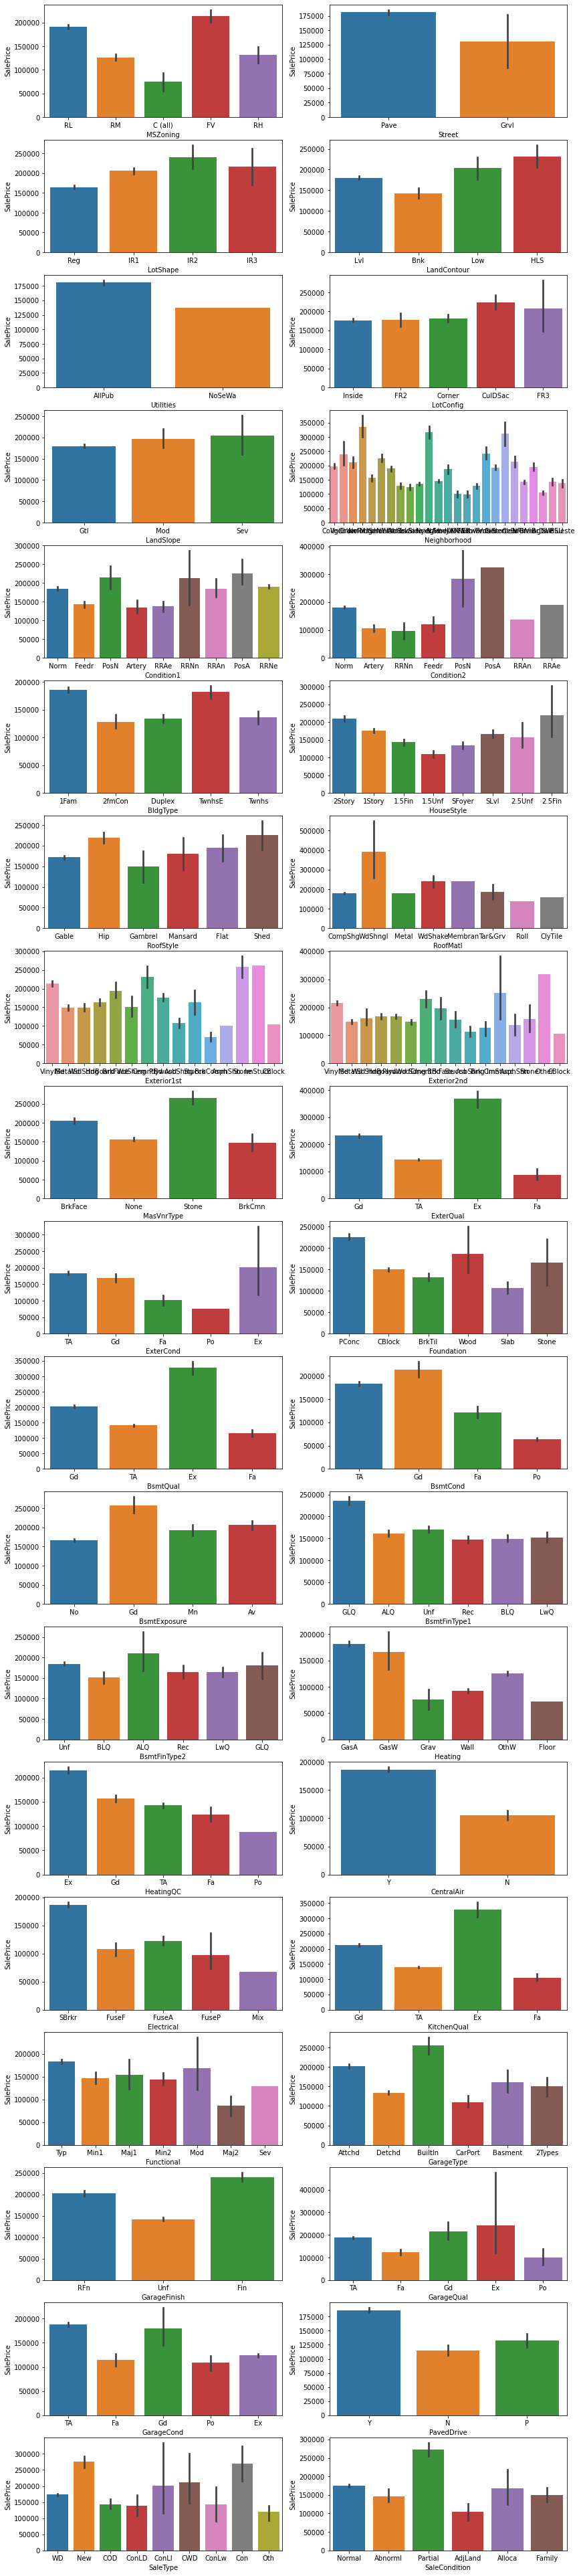

In [296]:
plt.figure(figsize=(14,70))

plt.subplot(19,2,1)
sns.barplot(x = 'MSZoning', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,2)
sns.barplot(x = 'Street', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,3)
sns.barplot(x = 'LotShape', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,4)
sns.barplot(x = 'LandContour', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,5)
sns.barplot(x = 'Utilities', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,6)
sns.barplot(x = 'LotConfig', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,7)
sns.barplot(x = 'LandSlope', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,8)
sns.barplot(x = 'Neighborhood', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,9)
sns.barplot(x = 'Condition1', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,10)
sns.barplot(x = 'Condition2', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,11)
sns.barplot(x = 'BldgType', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,12)
sns.barplot(x = 'HouseStyle', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,13)
sns.barplot(x = 'RoofStyle', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,14)
sns.barplot(x = 'RoofMatl', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,15)
sns.barplot(x = 'Exterior1st', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,16)
sns.barplot(x = 'Exterior2nd', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,17)
sns.barplot(x = 'MasVnrType', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,18)
sns.barplot(x = 'ExterQual', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,19)
sns.barplot(x = 'ExterCond', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,20)
sns.barplot(x = 'Foundation', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,21)
sns.barplot(x = 'BsmtQual', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,22)
sns.barplot(x = 'BsmtCond', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,23)
sns.barplot(x = 'BsmtExposure', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,24)
sns.barplot(x = 'BsmtFinType1', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,25)
sns.barplot(x = 'BsmtFinType2', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,26)
sns.barplot(x = 'Heating', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,27)
sns.barplot(x = 'HeatingQC', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,28)
sns.barplot(x = 'CentralAir', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,29)
sns.barplot(x = 'Electrical', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,30)
sns.barplot(x = 'KitchenQual', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,31)
sns.barplot(x = 'Functional', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,32)
sns.barplot(x = 'GarageType', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,33)
sns.barplot(x = 'GarageFinish', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,34)
sns.barplot(x = 'GarageQual', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,35)
sns.barplot(x = 'GarageCond', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,36)
sns.barplot(x = 'PavedDrive', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,37)
sns.barplot(x = 'SaleType', y = df_num_1.SalePrice ,data = df_cat_1)

plt.subplot(19,2,38)
sns.barplot(x = 'SaleCondition', y = df_num_1.SalePrice ,data = df_cat_1)

plt.show()

#### 6 Checking distribution of Traget Variable

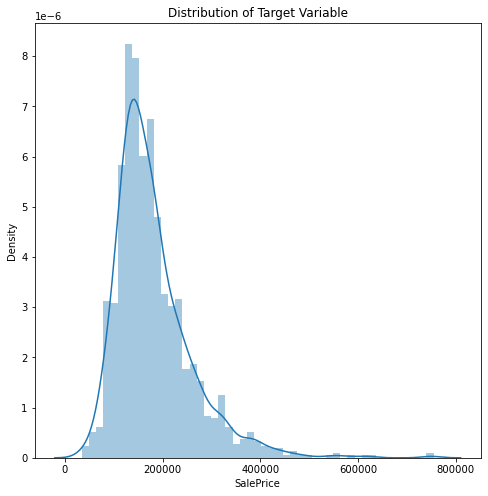

In [297]:
plt.figure(figsize=(8,8))
sns.distplot(df_num_1.SalePrice)
plt.title('Distribution of Target Variable')
plt.show()

#### 7. Checking Outliers

In [298]:
df_num_1.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea',
       'GarageYrBlt'],
      dtype='object')

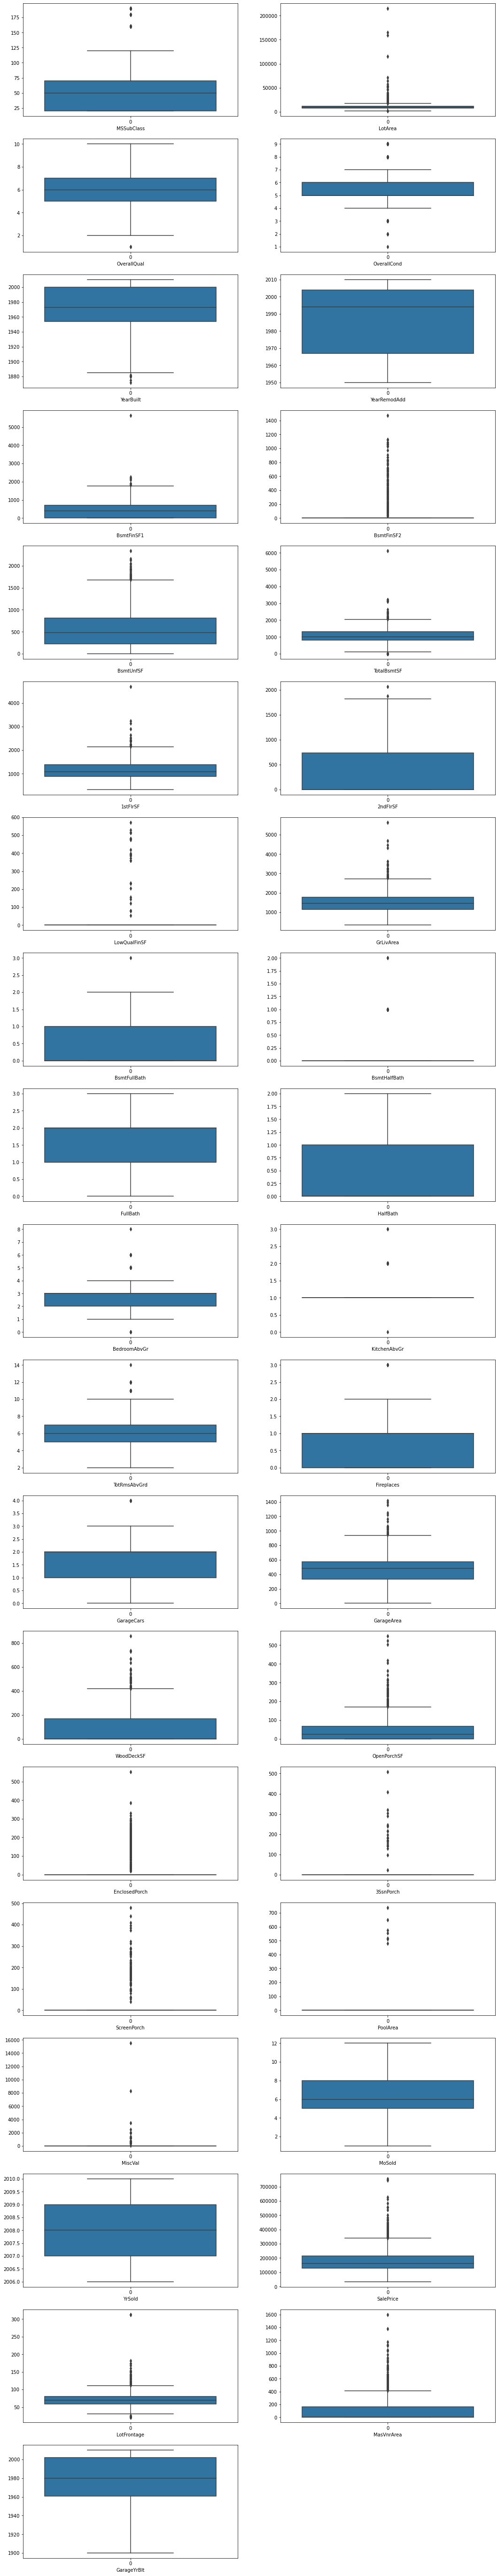

In [299]:
plt.figure(figsize=(18, 100))

plt.subplot(19,2,1)
sns.boxplot(data = df_num_1['MSSubClass'])
plt.xlabel('MSSubClass')

plt.subplot(19,2,2)
sns.boxplot(data = df_num_1['LotArea'])
plt.xlabel('LotArea')

plt.subplot(19,2,3)
sns.boxplot(data = df_num_1['OverallQual'])
plt.xlabel('OverallQual')

plt.subplot(19,2,4)
sns.boxplot(data = df_num_1['OverallCond'])
plt.xlabel('OverallCond')

plt.subplot(19,2,5)
sns.boxplot(data = df_num_1['YearBuilt'])
plt.xlabel('YearBuilt')

plt.subplot(19,2,6)
sns.boxplot(data = df_num_1['YearRemodAdd'])
plt.xlabel('YearRemodAdd')

plt.subplot(19,2,7)
sns.boxplot(data = df_num_1['BsmtFinSF1'])
plt.xlabel('BsmtFinSF1')

plt.subplot(19,2,8)
sns.boxplot(data = df_num_1['BsmtFinSF2'])
plt.xlabel('BsmtFinSF2')

plt.subplot(19,2,9)
sns.boxplot(data = df_num_1['BsmtUnfSF'])
plt.xlabel('BsmtUnfSF')

plt.subplot(19,2,10)
sns.boxplot(data = df_num_1['TotalBsmtSF'])
plt.xlabel('TotalBsmtSF')

plt.subplot(19,2,11)
sns.boxplot(data = df_num_1['1stFlrSF'])
plt.xlabel('1stFlrSF')

plt.subplot(19,2,12)
sns.boxplot(data = df_num_1['2ndFlrSF'])
plt.xlabel('2ndFlrSF')

plt.subplot(19,2,13)
sns.boxplot(data = df_num_1['LowQualFinSF'])
plt.xlabel('LowQualFinSF')

plt.subplot(19,2,14)
sns.boxplot(data = df_num_1['GrLivArea'])
plt.xlabel('GrLivArea')

plt.subplot(19,2,15)
sns.boxplot(data = df_num_1['BsmtFullBath'])
plt.xlabel('BsmtFullBath')

plt.subplot(19,2,16)
sns.boxplot(data = df_num_1['BsmtHalfBath'])
plt.xlabel('BsmtHalfBath')

plt.subplot(19,2,17)
sns.boxplot(data = df_num_1['FullBath'])
plt.xlabel('FullBath')

plt.subplot(19,2,18)
sns.boxplot(data = df_num_1['HalfBath'])
plt.xlabel('HalfBath')

plt.subplot(19,2,19)
sns.boxplot(data = df_num_1['BedroomAbvGr'])
plt.xlabel('BedroomAbvGr')

plt.subplot(19,2,20)
sns.boxplot(data = df_num_1['KitchenAbvGr'])
plt.xlabel('KitchenAbvGr')

plt.subplot(19,2,21)
sns.boxplot(data = df_num_1['TotRmsAbvGrd'])
plt.xlabel('TotRmsAbvGrd')

plt.subplot(19,2,22)
sns.boxplot(data = df_num_1['Fireplaces'])
plt.xlabel('Fireplaces')

plt.subplot(19,2,23)
sns.boxplot(data = df_num_1['GarageCars'])
plt.xlabel('GarageCars')

plt.subplot(19,2,24)
sns.boxplot(data = df_num_1['GarageArea'])
plt.xlabel('GarageArea')

plt.subplot(19,2,25)
sns.boxplot(data = df_num_1['WoodDeckSF'])
plt.xlabel('WoodDeckSF')

plt.subplot(19,2,26)
sns.boxplot(data = df_num_1['OpenPorchSF'])
plt.xlabel('OpenPorchSF')

plt.subplot(19,2,27)
sns.boxplot(data = df_num_1['EnclosedPorch'])
plt.xlabel('EnclosedPorch')

plt.subplot(19,2,28)
sns.boxplot(data = df_num_1['3SsnPorch'])
plt.xlabel('3SsnPorch')

plt.subplot(19,2,29)
sns.boxplot(data = df_num_1['ScreenPorch'])
plt.xlabel('ScreenPorch')

plt.subplot(19,2,30)
sns.boxplot(data = df_num_1['PoolArea'])
plt.xlabel('PoolArea')

plt.subplot(19,2,31)
sns.boxplot(data = df_num_1['MiscVal'])
plt.xlabel('MiscVal')

plt.subplot(19,2,32)
sns.boxplot(data = df_num_1['MoSold'])
plt.xlabel('MoSold')

plt.subplot(19,2,33)
sns.boxplot(data = df_num_1['YrSold'])
plt.xlabel('YrSold')

plt.subplot(19,2,34)
sns.boxplot(data = df_num_1['SalePrice'])
plt.xlabel('SalePrice')

plt.subplot(19,2,35)
sns.boxplot(data = df_num_1['LotFrontage'])
plt.xlabel('LotFrontage')

plt.subplot(19,2,36)
sns.boxplot(data = df_num_1['MasVnrArea'])
plt.xlabel('MasVnrArea')

plt.subplot(19,2,37)
sns.boxplot(data = df_num_1['GarageYrBlt'])
plt.xlabel('GarageYrBlt')

plt.show()

#### 7. Checking correlation between contineous variables

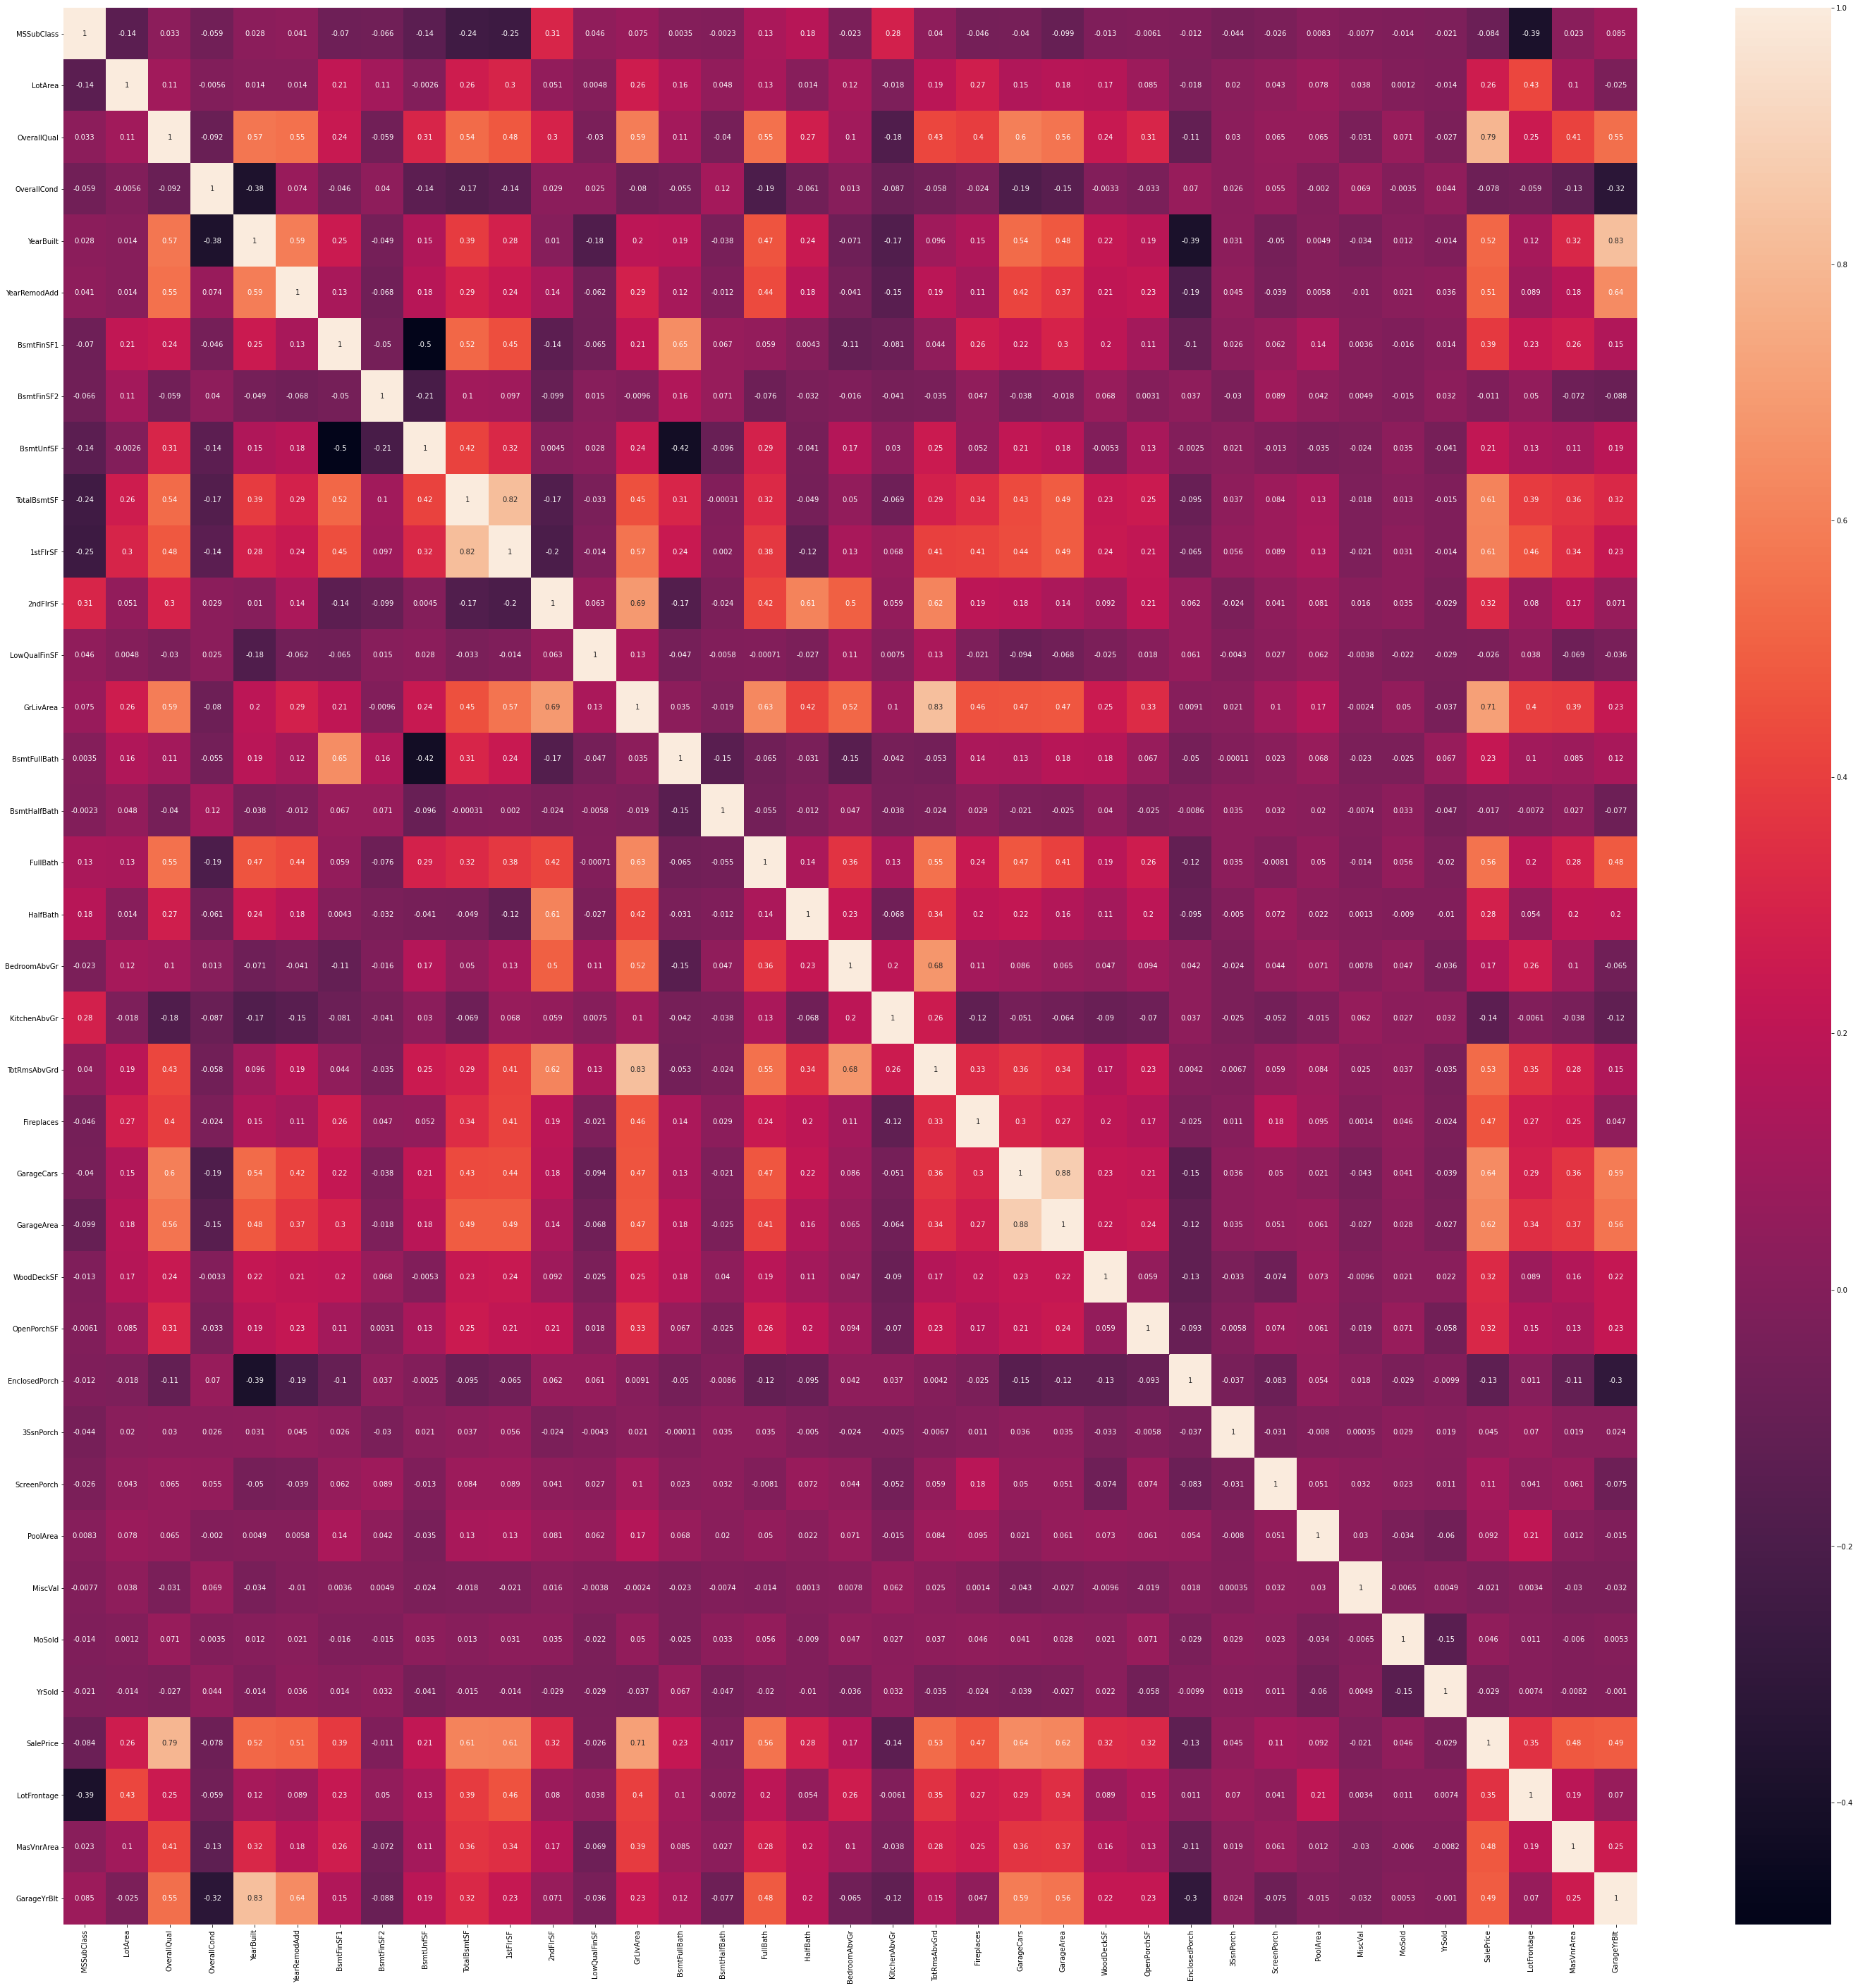

In [300]:
plt.figure(figsize=(50,50))
sns.heatmap(df_num_1.corr(), annot= True)
plt.show()

As we found lots of insights from EDA, so its time to perform feature engineering on base/raw data

# (E). Feature Engineering

#### 1. Removing duplicates (if any)

In [301]:
data_2 = data.drop_duplicates()

In [302]:
data_2.shape

(1460, 81)

#### 2. Removing not required variable "Id"

In [303]:
data_2.drop(['Id'], axis = 1, inplace = True)

In [304]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### 3. Removing Outliers

In [305]:
# Function to remove outlier from numerical values

def outlier_remove(df):
    for col in df.columns:
        print("capping on the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

In [306]:
data_3 = outlier_remove(data_2)

capping on the  MSSubClass
capping on the  MSZoning
capping on the  LotFrontage
capping on the  LotArea
capping on the  Street
capping on the  Alley
capping on the  LotShape
capping on the  LandContour
capping on the  Utilities
capping on the  LotConfig
capping on the  LandSlope
capping on the  Neighborhood
capping on the  Condition1
capping on the  Condition2
capping on the  BldgType
capping on the  HouseStyle
capping on the  OverallQual
capping on the  OverallCond
capping on the  YearBuilt
capping on the  YearRemodAdd
capping on the  RoofStyle
capping on the  RoofMatl
capping on the  Exterior1st
capping on the  Exterior2nd
capping on the  MasVnrType
capping on the  MasVnrArea
capping on the  ExterQual
capping on the  ExterCond
capping on the  Foundation
capping on the  BsmtQual
capping on the  BsmtCond
capping on the  BsmtExposure
capping on the  BsmtFinType1
capping on the  BsmtFinSF1
capping on the  BsmtFinType2
capping on the  BsmtFinSF2
capping on the  BsmtUnfSF
capping on the  T

In [307]:
data_3.shape

(1460, 80)

#### 3. Boxplot after outlier removal

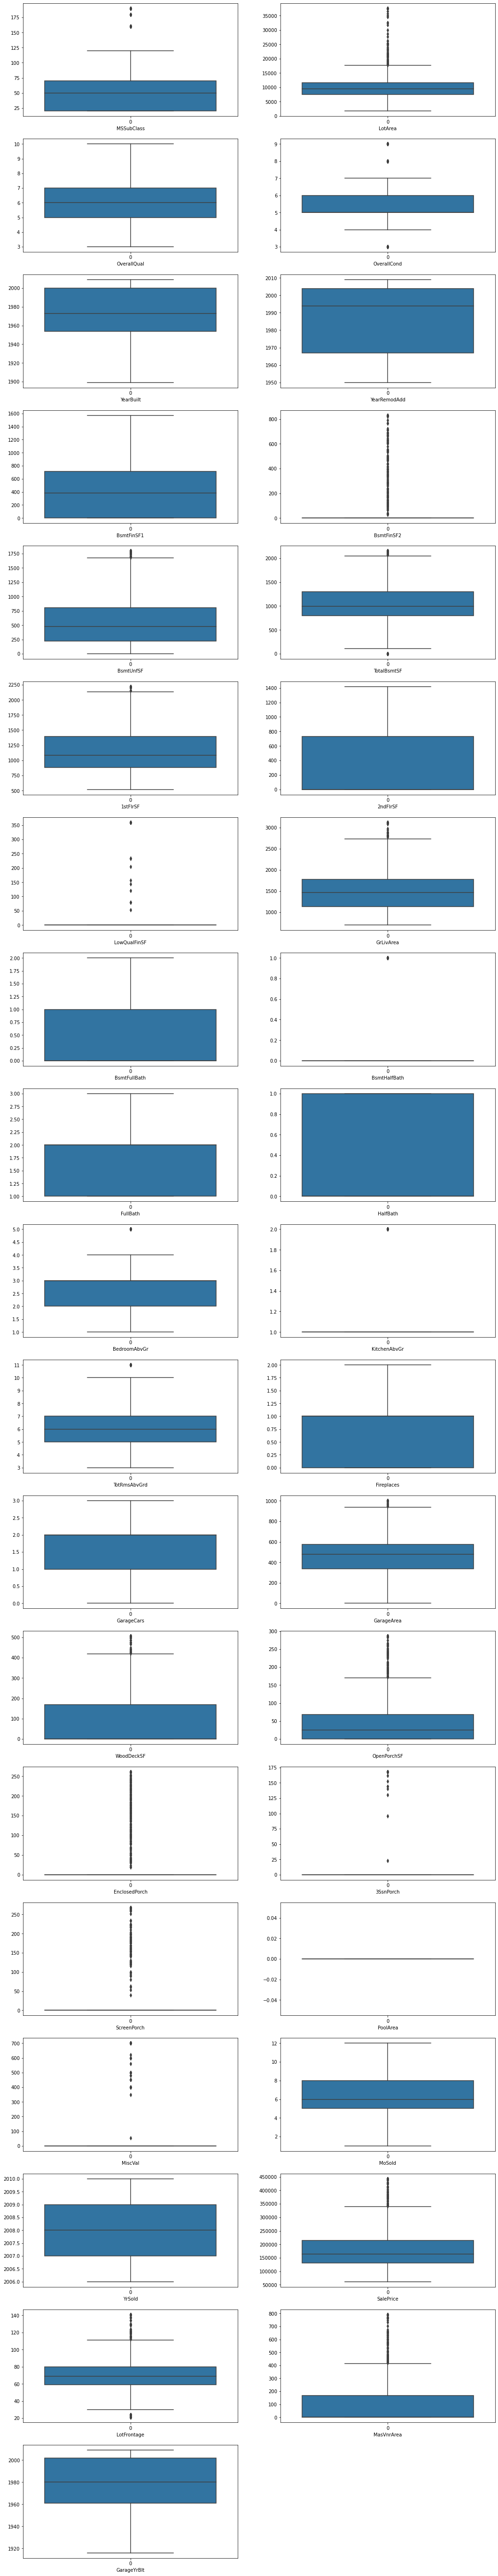

In [308]:
plt.figure(figsize=(18, 100))

plt.subplot(19,2,1)
sns.boxplot(data = data_3['MSSubClass'])
plt.xlabel('MSSubClass')

plt.subplot(19,2,2)
sns.boxplot(data = data_3['LotArea'])
plt.xlabel('LotArea')

plt.subplot(19,2,3)
sns.boxplot(data = data_3['OverallQual'])
plt.xlabel('OverallQual')

plt.subplot(19,2,4)
sns.boxplot(data = data_3['OverallCond'])
plt.xlabel('OverallCond')

plt.subplot(19,2,5)
sns.boxplot(data = data_3['YearBuilt'])
plt.xlabel('YearBuilt')

plt.subplot(19,2,6)
sns.boxplot(data = data_3['YearRemodAdd'])
plt.xlabel('YearRemodAdd')

plt.subplot(19,2,7)
sns.boxplot(data = data_3['BsmtFinSF1'])
plt.xlabel('BsmtFinSF1')

plt.subplot(19,2,8)
sns.boxplot(data = data_3['BsmtFinSF2'])
plt.xlabel('BsmtFinSF2')

plt.subplot(19,2,9)
sns.boxplot(data = data_3['BsmtUnfSF'])
plt.xlabel('BsmtUnfSF')

plt.subplot(19,2,10)
sns.boxplot(data = data_3['TotalBsmtSF'])
plt.xlabel('TotalBsmtSF')

plt.subplot(19,2,11)
sns.boxplot(data = data_3['1stFlrSF'])
plt.xlabel('1stFlrSF')

plt.subplot(19,2,12)
sns.boxplot(data = data_3['2ndFlrSF'])
plt.xlabel('2ndFlrSF')

plt.subplot(19,2,13)
sns.boxplot(data = data_3['LowQualFinSF'])
plt.xlabel('LowQualFinSF')

plt.subplot(19,2,14)
sns.boxplot(data = data_3['GrLivArea'])
plt.xlabel('GrLivArea')

plt.subplot(19,2,15)
sns.boxplot(data = data_3['BsmtFullBath'])
plt.xlabel('BsmtFullBath')

plt.subplot(19,2,16)
sns.boxplot(data = data_3['BsmtHalfBath'])
plt.xlabel('BsmtHalfBath')

plt.subplot(19,2,17)
sns.boxplot(data = data_3['FullBath'])
plt.xlabel('FullBath')

plt.subplot(19,2,18)
sns.boxplot(data = data_3['HalfBath'])
plt.xlabel('HalfBath')

plt.subplot(19,2,19)
sns.boxplot(data = data_3['BedroomAbvGr'])
plt.xlabel('BedroomAbvGr')

plt.subplot(19,2,20)
sns.boxplot(data = data_3['KitchenAbvGr'])
plt.xlabel('KitchenAbvGr')

plt.subplot(19,2,21)
sns.boxplot(data = data_3['TotRmsAbvGrd'])
plt.xlabel('TotRmsAbvGrd')

plt.subplot(19,2,22)
sns.boxplot(data = data_3['Fireplaces'])
plt.xlabel('Fireplaces')

plt.subplot(19,2,23)
sns.boxplot(data = data_3['GarageCars'])
plt.xlabel('GarageCars')

plt.subplot(19,2,24)
sns.boxplot(data = data_3['GarageArea'])
plt.xlabel('GarageArea')

plt.subplot(19,2,25)
sns.boxplot(data = data_3['WoodDeckSF'])
plt.xlabel('WoodDeckSF')

plt.subplot(19,2,26)
sns.boxplot(data = data_3['OpenPorchSF'])
plt.xlabel('OpenPorchSF')

plt.subplot(19,2,27)
sns.boxplot(data = data_3['EnclosedPorch'])
plt.xlabel('EnclosedPorch')

plt.subplot(19,2,28)
sns.boxplot(data = data_3['3SsnPorch'])
plt.xlabel('3SsnPorch')

plt.subplot(19,2,29)
sns.boxplot(data = data_3['ScreenPorch'])
plt.xlabel('ScreenPorch')

plt.subplot(19,2,30)
sns.boxplot(data = data_3['PoolArea'])
plt.xlabel('PoolArea')

plt.subplot(19,2,31)
sns.boxplot(data = data_3['MiscVal'])
plt.xlabel('MiscVal')

plt.subplot(19,2,32)
sns.boxplot(data = data_3['MoSold'])
plt.xlabel('MoSold')

plt.subplot(19,2,33)
sns.boxplot(data = data_3['YrSold'])
plt.xlabel('YrSold')

plt.subplot(19,2,34)
sns.boxplot(data = data_3['SalePrice'])
plt.xlabel('SalePrice')

plt.subplot(19,2,35)
sns.boxplot(data = data_3['LotFrontage'])
plt.xlabel('LotFrontage')

plt.subplot(19,2,36)
sns.boxplot(data = data_3['MasVnrArea'])
plt.xlabel('MasVnrArea')

plt.subplot(19,2,37)
sns.boxplot(data = data_3['GarageYrBlt'])
plt.xlabel('GarageYrBlt')

plt.show()

#### 4. Distribution of target variable after outlier removal

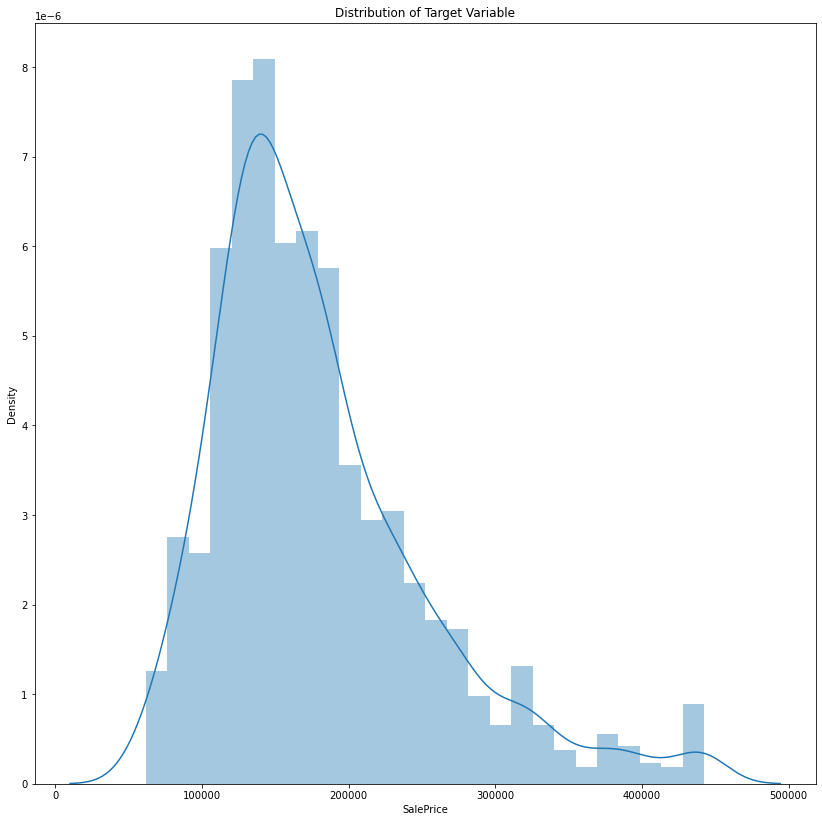

In [309]:
plt.figure(figsize=(14,14))
sns.distplot(data_3.SalePrice)
plt.title('Distribution of Target Variable')
plt.show()

In [310]:
data_3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003.0,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548.0,TA,TA,Y,0.0,61.0,0.00,0,0.0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976.0,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460.0,TA,TA,Y,298.0,0.0,0.00,0,0.0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001.0,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608.0,TA,TA,Y,0.0,42.0,0.00,0,0.0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915.0,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642.0,TA,TA,Y,0.0,35.0,261.05,0,0.0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000.0,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836.0,TA,TA,Y,192.0,84.0,0.00,0,0.0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


#### 5. Removing columns where NA is greater than 80%

In [311]:
# limit percentage 80%

limitPer = len(df_cat) * .80

data_4 = data_3.dropna(thresh=limitPer, axis=1)

In [312]:
data_4.shape

(1460, 75)

#### 6. Data Bifurcation

In [313]:
# Integer
data_num_1 = data_4.select_dtypes(include=['int64','float64'])

data_cat_1 = data_4.select_dtypes(include=['object'])

#### 7. Creating new columns in data_num_1

In [314]:
data_num_1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450.0,7,5,2003.0,2003,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0,1710.0,1,0,2,1,3,1,8,0,2003.0,2,548.0,0.0,61.0,0.00,0,0.0,0,0,2,2008,208500.0
1,20,80.0,9600.0,6,8,1976.0,1976,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0,1262.0,0,1,2,0,3,1,6,1,1976.0,2,460.0,298.0,0.0,0.00,0,0.0,0,0,5,2007,181500.0
2,60,68.0,11250.0,7,5,2001.0,2002,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0,1786.0,1,0,2,1,3,1,6,1,2001.0,2,608.0,0.0,42.0,0.00,0,0.0,0,0,9,2008,223500.0
3,70,60.0,9550.0,7,5,1915.0,1970,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0,1717.0,1,0,1,0,3,1,7,1,1998.0,3,642.0,0.0,35.0,261.05,0,0.0,0,0,2,2006,140000.0
4,60,84.0,14260.0,8,5,2000.0,2000,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0,2198.0,1,0,2,1,4,1,9,1,2000.0,3,836.0,192.0,84.0,0.00,0,0.0,0,0,12,2008,250000.0


In [315]:
# Creating new columns YearBuilt_today, YearRemodAdd_today, YrSold_today repect to current year

data_num_1['YearBuilt_today'] = date.today().year - data_num_1.YearBuilt

data_num_1['YearRemodAdd_today'] = date.today().year - data_num_1.YearRemodAdd

data_num_1['YrSold_today'] = date.today().year - data_num_1.YrSold

In [316]:
data_num_1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearBuilt_today,YearRemodAdd_today,YrSold_today
0,60,65.0,8450.0,7,5,2003.0,2003,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0,1710.0,1,0,2,1,3,1,8,0,2003.0,2,548.0,0.0,61.0,0.00,0,0.0,0,0,2,2008,208500.0,19.0,19,14
1,20,80.0,9600.0,6,8,1976.0,1976,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0,1262.0,0,1,2,0,3,1,6,1,1976.0,2,460.0,298.0,0.0,0.00,0,0.0,0,0,5,2007,181500.0,46.0,46,15
2,60,68.0,11250.0,7,5,2001.0,2002,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0,1786.0,1,0,2,1,3,1,6,1,2001.0,2,608.0,0.0,42.0,0.00,0,0.0,0,0,9,2008,223500.0,21.0,20,14
3,70,60.0,9550.0,7,5,1915.0,1970,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0,1717.0,1,0,1,0,3,1,7,1,1998.0,3,642.0,0.0,35.0,261.05,0,0.0,0,0,2,2006,140000.0,107.0,52,16
4,60,84.0,14260.0,8,5,2000.0,2000,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0,2198.0,1,0,2,1,4,1,9,1,2000.0,3,836.0,192.0,84.0,0.00,0,0.0,0,0,12,2008,250000.0,22.0,22,14


#### 8. Removing unrequired columns related to year

In [317]:
data_num_1.drop(['YearBuilt', 'YearRemodAdd','YrSold'], axis = 1, inplace = True)

In [318]:
data_num_1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_today,YearRemodAdd_today,YrSold_today
0,60,65.0,8450.0,7,5,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0,1710.0,1,0,2,1,3,1,8,0,2003.0,2,548.0,0.0,61.0,0.00,0,0.0,0,0,2,208500.0,19.0,19,14
1,20,80.0,9600.0,6,8,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0,1262.0,0,1,2,0,3,1,6,1,1976.0,2,460.0,298.0,0.0,0.00,0,0.0,0,0,5,181500.0,46.0,46,15
2,60,68.0,11250.0,7,5,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0,1786.0,1,0,2,1,3,1,6,1,2001.0,2,608.0,0.0,42.0,0.00,0,0.0,0,0,9,223500.0,21.0,20,14
3,70,60.0,9550.0,7,5,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0,1717.0,1,0,1,0,3,1,7,1,1998.0,3,642.0,0.0,35.0,261.05,0,0.0,0,0,2,140000.0,107.0,52,16
4,60,84.0,14260.0,8,5,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0,2198.0,1,0,2,1,4,1,9,1,2000.0,3,836.0,192.0,84.0,0.00,0,0.0,0,0,12,250000.0,22.0,22,14


#### 9. Removing NA's from both data_num_1 and data_cat_1

In [319]:
# Removing NA's from numerical data

data_num_1['MasVnrArea'] = data_num_1['MasVnrArea'].fillna(data_num_1['MasVnrArea'].mean())

data_num_1['LotFrontage'] = data_num_1['LotFrontage'].fillna(data_num_1['LotFrontage'].mean())

data_num_1['GarageYrBlt'] = data_num_1['GarageYrBlt'].fillna(data_num_1['GarageYrBlt'].mean())

In [320]:
# Removing NA's from categorical data

data_cat_1['MasVnrType'] = data_cat_1['MasVnrType'].fillna(data_cat_1['MasVnrType'].mode()[0])

data_cat_1['BsmtQual'] = data_cat_1['BsmtQual'].fillna(data_cat_1['BsmtQual'].mode()[0])

data_cat_1['BsmtCond'] = data_cat_1['BsmtCond'].fillna(data_cat_1['BsmtCond'].mode()[0])

data_cat_1['BsmtExposure'] = data_cat_1['BsmtExposure'].fillna(data_cat_1['BsmtExposure'].mode()[0])

data_cat_1['BsmtFinType1'] = data_cat_1['BsmtFinType1'].fillna(data_cat_1['BsmtFinType1'].mode()[0])

data_cat_1['BsmtFinType2'] = data_cat_1['BsmtFinType2'].fillna(data_cat_1['BsmtFinType2'].mode()[0])

data_cat_1['Electrical'] = data_cat_1['Electrical'].fillna(data_cat_1['Electrical'].mode()[0])

data_cat_1['GarageType'] = data_cat_1['GarageType'].fillna(data_cat_1['GarageType'].mode()[0])

data_cat_1['GarageFinish'] = data_cat_1['GarageFinish'].fillna(data_cat_1['GarageFinish'].mode()[0])

data_cat_1['GarageQual'] = data_cat_1['GarageQual'].fillna(data_cat_1['GarageQual'].mode()[0])

data_cat_1['GarageCond'] = data_cat_1['GarageCond'].fillna(data_cat_1['GarageCond'].mode()[0])

In [321]:
data_num_1.isna().sum()

MSSubClass            0
LotFrontage           0
LotArea               0
OverallQual           0
OverallCond           0
MasVnrArea            0
BsmtFinSF1            0
BsmtFinSF2            0
BsmtUnfSF             0
TotalBsmtSF           0
1stFlrSF              0
2ndFlrSF              0
LowQualFinSF          0
GrLivArea             0
BsmtFullBath          0
BsmtHalfBath          0
FullBath              0
HalfBath              0
BedroomAbvGr          0
KitchenAbvGr          0
TotRmsAbvGrd          0
Fireplaces            0
GarageYrBlt           0
GarageCars            0
GarageArea            0
WoodDeckSF            0
OpenPorchSF           0
EnclosedPorch         0
3SsnPorch             0
ScreenPorch           0
PoolArea              0
MiscVal               0
MoSold                0
SalePrice             0
YearBuilt_today       0
YearRemodAdd_today    0
YrSold_today          0
dtype: int64

In [322]:
data_cat_1.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

#### 10. Creating dummy variables on categorical values

In [323]:
data_cat_1.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [324]:
data_cat_2 = pd.get_dummies(data_cat_1, drop_first = True)

In [325]:
data_cat_2.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0

In [326]:
data_cat_2.shape

(1460, 196)

#### 11. Concatinating numerical & Categorical data to create final data

In [327]:
data_final = pd.concat([data_num_1, data_cat_2], axis = 1)

In [328]:
data_final.shape

(1460, 233)

In [329]:
data_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_today,YearRemodAdd_today,YrSold_today,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0,1710.0,1,0,2,1,3,1,8,0,2003.0,2,548.0,0.0,61.0,0.00,0,0.0,0,0,2,208500.0,19.0,19,14,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,

# (F). Spliting data into Train Test split

In [330]:
# Spliting data into Dependent & independent variables
X = data_final.drop(['SalePrice'], axis = 1)
y = data_final['SalePrice']

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size=0.8, random_state=123)

# (G). Min Max Scaling of independent data

In [332]:
scaler = MinMaxScaler()

In [333]:
# For X_train data
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)

In [334]:
# For X_test data
scaler.fit(X_test)
X_test_scale = scaler.transform(X_test)

In [335]:
X_test_scale

array([[0.23529412, 0.40500278, 0.21804164, ..., 0.        , 1.        ,
        0.        ],
       [0.29411765, 0.325     , 0.22068879, ..., 0.        , 1.        ,
        0.        ],
       [0.82352941, 0.09166667, 0.04689637, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.17647059, 0.325     , 0.17788854, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.40833333, 0.27658548, ..., 1.        , 0.        ,
        0.        ],
       [0.17647059, 0.325     , 0.20631058, ..., 0.        , 1.        ,
        0.        ]])

# (H). Model Building & Evaluation

## 1. Linear Regression

In [336]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [337]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-407294.5983416948
[-4.74248742e+01  3.78584008e+01  1.19749074e+00  6.91418542e+03
  5.30582082e+03  7.44049576e+00 -2.50519973e+01 -4.15901332e+01
 -4.50712631e+01  5.69235160e+01 -7.82439825e+01 -7.59317968e+01
 -1.46114677e+02  1.33490621e+02  1.87718371e+03 -2.82231654e+03
  2.58099451e+02 -1.04091296e+03 -2.64675237e+03 -9.87404071e+03
  4.00329323e+02  2.27830119e+03  8.40680058e+00  5.08219820e+03
  7.85487104e+00  1.92109777e+01  3.00438012e+01  2.82407591e+00
  5.48934507e+01  2.25490381e+01 -2.94924030e-06  9.03334338e+00
  1.34475524e+02 -3.11823667e+02 -1.05315133e+02  3.00857827e+02
  3.90864540e+04  3.60269711e+04  3.42610921e+04  3.00249050e+04
  2.72316090e+04  6.83888838e+03  1.34151731e+04  2.30730959e+03
  1.38728107e+04 -7.25888780e+03  6.59940536e+03 -2.73458094e+04
  8.34250071e+03 -5.56756844e+03 -5.44268379e+03 -3.94351055e+02
  1.13624992e+04 -9.74031221e+03 -7.21465931e+03  1.12393906e+03
 -3.27883965e+03 -1.69993825e+04 -1.21607083e+04  8.49610680e+03
 -1.73

In [338]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss1_lr)
metric.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9429187026504919
0.9061851277784916
372025999989.6295
372025999989.6295
318515410.95002526
476574924.98065037


## 2. Ridge Regression

In [339]:
# list of alphas to tune - if value too high
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 
                  0.2, 0.3, 0.4, 0.4, 0.5,
                  0.6, 0.6, 0.7, 0.8, 0.9,
                  1.0, 2.0, 3.0, 4.0, 5.0,
                  6.0, 7.0, 8.0, 9.0, 10.0,
                  20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv = folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.4,
                                   0.5, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [340]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [341]:
# Fitting Ridge model for alpha = 10 and printing coefficient which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.28596823e+02  3.27064135e+01  5.95327211e-01  8.56308185e+03
  5.49920479e+03  3.39164158e+00 -2.69256247e+01 -4.09672027e+01
 -4.74935002e+01  5.94692639e+01 -7.78961155e+01 -7.72076016e+01
 -1.51147518e+02  1.34307226e+02  1.27987572e+03 -2.91891714e+03
  1.16119697e+03  5.72413612e+02 -2.42276087e+03 -7.66077407e+03
  1.77932788e+02  3.31443971e+03  3.25595464e+01  8.96346654e+03
 -2.84690350e+00  2.24748405e+01  1.42009930e+01 -1.79207581e+00
  5.11313572e+01  1.84190578e+01  0.00000000e+00  3.31938207e+00
  2.18060793e+02 -2.13378069e+02 -1.02285054e+02  3.17138138e+02
  6.87033794e+03  3.29797272e+03  6.47265418e+03  5.06161614e+02
  7.73378820e+03  5.93089011e+03 -9.88886650e+03  8.96765895e+02
  1.48681317e+04  1.51863773e+03  7.37500943e+03 -2.15252143e+03
  8.62263138e+03 -3.14041398e+03 -1.18096086e+03  9.92701367e+01
  7.13925058e+03  9.91859904e+02 -2.49598600e+02  4.37516939e+03
  3.89379746e+03 -2.30608802e+03 -6.12600453e+03  1.22935163e+04
 -1.06244248e+04 -9.17872

In [342]:
# Lets calculate some metrices such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss1_lr)
metric2.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9231515661765174
0.9119747954885402
500857842556.80347
500857842556.80347
428816646.0246605
447163698.495531


## 3. Lasso Regression

In [343]:
# list of alphas to tune - if value too high
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 
                  0.2, 0.3, 0.4, 0.4, 0.5,
                  0.6, 0.6, 0.7, 0.8, 0.9,
                  1.0, 2.0, 3.0, 4.0, 5.0,
                  6.0, 7.0, 8.0, 9.0, 10.0,
                  20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv = folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.4,
                                   0.5, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [344]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [345]:
# Fitting Lasso model for alpha = 100 and printing coefficient which have been penalised
alpha = 100
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-1.46464312e+02  2.51109550e+01  6.92859221e-01  8.73218080e+03
  5.81047975e+03  5.26940083e-01 -2.57725646e+01 -4.02808496e+01
 -4.53861501e+01  5.60134942e+01 -6.59468751e+01 -6.70386559e+01
 -1.43508905e+02  1.23024434e+02  1.45723295e+03 -0.00000000e+00
  2.07110017e+02  0.00000000e+00 -2.61288433e+03 -5.91691867e+03
  3.51492656e+02  3.10893351e+03  5.85390687e+01  8.52540954e+03
 -3.52367136e+00  2.19673026e+01  1.63536555e+01 -0.00000000e+00
  4.40283840e+01  2.13121814e+01  0.00000000e+00  1.55964948e+00
  1.77754484e+02 -2.62124956e+02 -1.02102696e+02  2.97608248e+02
  0.00000000e+00  0.00000000e+00  3.79007645e+03 -0.00000000e+00
  0.00000000e+00  2.81362855e+03 -8.17109994e+03  8.45336212e+02
  1.39454513e+04  0.00000000e+00  6.31274836e+03 -0.00000000e+00
  8.60861183e+03 -0.00000000e+00 -0.00000000e+00  4.02273843e+02
  4.93919944e+03 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  5.21312591e+03  0.00000000e+00 -0.00000000e+00  1.60546136e+04
 -6.23231652e+03 -1.93445

In [346]:
# Lets calculate some metrices such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss1_lr)
metric3.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9191340425072047
0.9105523634202081
527041957669.0885
527041957669.0885
451234552.7988771
454389583.26415145


# Outcome in Tabular Format

In [347]:
lr_table = {'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)',
                      'MSE (Train)', 'MSE (Test)'],
           'Linear Regression': metric
           }

lr_metric = pd.DataFrame(lr_table, columns=['Metric', 'Linear Regression'])

rg_metric = pd.Series(metric2, name='Ridge Regression')
ls_metric = pd.Series(metric3, name='Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis=1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.429187e-01,9.231516e-01,9.191340e-01
1,R2 Score (Test),9.061851e-01,9.119748e-01,9.105524e-01
2,RSS (Train),3.720260e+11,5.008578e+11,5.270420e+11
3,RSS (Test),3.720260e+11,5.008578e+11,5.270420e+11
4,MSE (Train),1.784700e+04,2.070789e+04,2.124228e+04
5,MSE (Test),2.183060e+04,2.114625e+04,2.131642e+04


# I). Model Coefficients after regularization

In [348]:
betas = pd.DataFrame(index = X.columns)

In [349]:
betas.rows = X.columns

In [350]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_ 

In [351]:
betas

,Linear,Ridge,Lasso
MSSubClass,-4.742487e+01,-128.596823,-146.464312
LotFrontage,3.785840e+01,32.706414,25.110955
LotArea,1.197491e+00,0.595327,0.692859
OverallQual,6.914185e+03,8563.081850,8732.180798
OverallCond,5.305821e+03,5499.204793,5810.479747
MasVnrArea,7.440496e+00,3.391642,0.526940
BsmtFinSF1,-2.505200e+01,-26.925625,-25.772565
BsmtFinSF2,-4.159013e+01,-40.967203,-40.280850
BsmtUnfSF,-4.507126e+01,-47.493500,-45.386150
TotalBsmtSF,5.692352e+01,59.469264,56.013494


# J). Questions

### Question 1

Question 1
- What is the optimal value of alpha for ridge and lasso regression? 
- What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
- What will be the most important predictor variables after the change is implemented?

In [352]:
# Fitting Ridge model for alpha = 10 and printing coefficient which have been penalised
# Optimal value for Ridge is 10, but if we increase it to 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#print(ridge.coef_)

Ridge(alpha=20)

In [353]:
# Lets calculate some metrices such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss1_lr)
metric2.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

# For Lambda = 10:
# 0.9232232655459345
# 0.912205830868293
# 499335813828.0283
# 499335813828.0283
# 427513539.2363256
# 444580990.8415292

# For Lambda = 20:
# 0.9178708406700604
# 0.9120283279302304
# 534146586262.5731
# 534146586262.5731
# 457317282.75905234
# 445479848.16726714

0.9177804919607251
0.911775419169619
535863691213.56824
535863691213.56824
458787406.8609317
448176520.3646311


In [354]:
# Fitting Lasso model for alpha = 100 and printing coefficient which have been penalised
# Optimal value of alpha = 100, changing it to 200
alpha = 200
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
#print(lasso.coef_)

Lasso(alpha=200)

In [355]:
# Lets calculate some metrices such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss1_lr)
metric3.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

# For lambda value 100:
# 0.9191511633171888
# 0.9106819861370373
# 525819702402.34863
# 525819702402.34863
# 450188101.37187386
# 452297589.87322485

# For lambda value 200:
# 0.9104986044804594
# 0.9075424633242539
# 582093683565.4589
# 582093683565.4589
# 498367879.76494765
# 468195822.9413338

0.9104005964756015
0.9072628119198001
583961984790.5574
583961984790.5574
499967452.7316416
471100342.6821822


In [356]:
betas = pd.DataFrame(index = X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_ 

betas.sort_values('Ridge')

# Top 5 predictor after change for ridge
# Neighborhood_NridgHt, Neighborhood_StoneBr, Neighborhood_NoRidge, BsmtQual_Gd, LandContour_HLS

# betas.sort_values('Lasso')
# Top 5 predictor after change for Lasso
# Neighborhood_NridgHt, Neighborhood_StoneBr, Neighborhood_NoRidge, Exterior1st_BrkFace, Neighborhood_Crawfor

,Linear,Ridge,Lasso
BsmtQual_Gd,-1.615358e+04,-12321.429945,-12084.635091
Neighborhood_Mitchel,-2.320133e+04,-9794.387478,-4046.690035
KitchenQual_Gd,-1.775114e+04,-9391.705748,-9205.901715
BsmtQual_TA,-1.465056e+04,-9291.374418,-8185.598161
KitchenQual_TA,-1.652889e+04,-8616.834449,-8797.524799
Neighborhood_Edwards,-1.737700e+04,-8608.780711,-3295.672200
Condition2_PosN,-1.295746e+05,-8470.314742,-0.000000
Neighborhood_Gilbert,-1.607619e+04,-7841.743423,-0.000000
Neighborhood_NWAmes,-1.949733e+04,-7689.639519,-1493.432905
ExterQual_TA,-7.645699e+03,-7326.598692,-3927.635370


### Question 2

Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. 
Now, which one will you choose to apply and why?

Answer:
The best value of lambda for Ridge is 10 & for Lasso is 100.
It’s a bias variance trade for overfitting of model vs underfitting the model. And our goal is to find the optimal value, as we run for different range of alpha for ridge and lasso regression. And we got the best optimal value is for Ridge is 10 & for lasso 100.


### Question 3

Question 3

After building the model, 
you realised that the five most important predictor variables in the lasso model are not available in the incoming data. 
You will now have to create another model excluding the five most important predictor variables. 
Which are the five most important predictor variables now?



In [357]:
# Answer Question 3
# As per my model below are the 5 most predictor variable
top_vars = ['Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_NoRidge', 
             'Exterior1st_BrkFace', 'Neighborhood_Crawfor']

# Creating new dataframe by removing top variables
X_train_new = X_train.drop(top_vars, axis = 1)
X_test_new = X_test.drop(top_vars, axis = 1)

In [358]:
# list of alphas to tune - if value too high
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 
                  0.2, 0.3, 0.4, 0.4, 0.5,
                  0.6, 0.6, 0.7, 0.8, 0.9,
                  1.0, 2.0, 3.0, 4.0, 5.0,
                  6.0, 7.0, 8.0, 9.0, 10.0,
                  20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv = folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.4,
                                   0.5, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [359]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [360]:
# Fitting Lasso model for alpha = 100 and printing coefficient which have been penalised
alpha = 50
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_new, y_train)
print(lasso.coef_)

[-1.28649341e+02  6.20962780e+01  8.22806758e-01  8.95599373e+03
  5.59765081e+03  9.70228703e+00 -1.74208007e+01 -3.00453807e+01
 -3.99401051e+01  4.94065409e+01 -6.78807661e+01 -7.12776774e+01
 -1.52699188e+02  1.27257462e+02  9.64090072e+02 -3.27013161e+03
  6.66135647e+01 -1.22626807e+02 -2.12292760e+03 -9.64070733e+03
 -0.00000000e+00  3.05963731e+03  5.21125843e+01  8.69072574e+03
 -3.18932495e+00  1.91572058e+01  1.42175862e+01 -1.54712906e+00
  4.72358288e+01  1.79217614e+01  0.00000000e+00  2.15209435e+00
  2.70287438e+02 -2.59290122e+02 -8.08671722e+01  2.09271770e+02
  3.26790124e+03  2.55684269e+03  8.13149376e+03  0.00000000e+00
  1.57135769e+04  3.59273455e+03 -1.86204489e+04  3.58398634e+02
  1.80273997e+04  1.14486988e+03  8.30122785e+03 -0.00000000e+00
  9.38148406e+03 -2.24516294e+03 -0.00000000e+00  3.85880592e+02
  6.97000104e+03  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -2.43230437e+03 -9.51993432e+03 -1.96940191e+04 -2.16045793e+04
 -2.34187318e+04 -6.01702

In [361]:
# Lets calculate some metrices such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss1_lr)
metric3.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9224377754908917
0.9139491410953016
505509956400.27966
505509956400.27966
432799620.2057189
437134120.1659188


In [362]:
betas = pd.DataFrame(index = X_train_new.columns)
betas.rows = X_train_new.columns
betas['Lasso'] = lasso.coef_ 

betas.sort_values('Lasso')

,Lasso
Condition2_PosN,-87130.829313
Neighborhood_Mitchel,-27643.888036
Neighborhood_Gilbert,-23418.731839
Neighborhood_NWAmes,-22067.574570
Neighborhood_Edwards,-21604.579287
Neighborhood_Timber,-21119.329743
Neighborhood_CollgCr,-19694.019054
Neighborhood_NAmes,-18843.288526
LotShape_IR3,-18620.448889
Neighborhood_Sawyer,-18113.358926


### Question 4

Question 4

How can you make sure that a model is robust and generalisable? 
What are the implications of the same for the accuracy of the model and why?

We can say that model is robust and generalised becoz.
We checked the R-Squared value, the difference between train & test r-squared value is low means model is robust.
And it works well with unseen data.
And model is generalised becoz, by using GridSearchCV we find out the optimal value of lambda amoung various test options.
We means that over model is best fit respect to bias-variance trade off.